# CNN 

 ## Importações

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import statistics as stats

import random
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pickle

from sklearn.model_selection import train_test_split
import sklearn

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
from keras.models import model_from_json
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import stats

## Configurações

In [15]:
batch_size = 2
img_width = 128
img_height = 128
num_classes=5
image_count = 711


## Importando dataset

In [16]:
pickle_in = open("X.pickle","rb")
x = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

print(len(y))

711


## Separando Dataset

In [25]:
x_splitted = []
y_splitted = []

for pos, label in enumerate(y):
   if label>= 0 and label <=4:
    x_splitted.append(x[pos])
    y_splitted.append(y[pos])
    
print(len(y_splitted))

x_val = np.asarray(x_splitted[0:119])
y_val = np.asarray(y_splitted[0:119])
x_train = np.asarray(x_splitted[120:401])
y_train = np.asarray(y_splitted[120:401])

402


## Modelo com Augumentation

In [26]:
data_augumentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
      
    layers.RandomRotation(30, fill_mode='reflect',
    interpolation='bilinear',),
    layers.RandomZoom(0.2),
  ]
)

model_augumentation = Sequential([
    data_augumentation,
    layers.Conv2D(32,3, kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(128,128,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(32,3, kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(128,128,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(256, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.001), activation='selu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
], name='augumentation_2CL')


## Treinando com Augumentation

In [27]:
#Compilando
model_augumentation.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.metrics.SparseCategoricalAccuracy()])

#Checkpoints
checkpoint_filepath = './checkpoints/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_sparse_categorical_accuracy',
    mode='max',
    save_best_only=True)

#Treinando
epochs = 10

history_augumentation = model_augumentation.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), batch_size = batch_size, epochs=epochs, callbacks=[model_checkpoint_callback])

#Carregando checkpoint
model_augumentation.load_weights(checkpoint_filepath)

model_augumentation.summary()

Epoch 1/10
141/141 [==============================] - 3s 15ms/step - loss: 21.4865 - sparse_categorical_accuracy: 0.3843 - val_loss: 2.0710 - val_sparse_categorical_accuracy: 0.3613
Epoch 2/10
141/141 [==============================] - 2s 15ms/step - loss: 1.7015 - sparse_categorical_accuracy: 0.4377 - val_loss: 1.6247 - val_sparse_categorical_accuracy: 0.4706
Epoch 3/10
141/141 [==============================] - 1s 10ms/step - loss: 1.6294 - sparse_categorical_accuracy: 0.4520 - val_loss: 1.6611 - val_sparse_categorical_accuracy: 0.3782
Epoch 4/10
141/141 [==============================] - 1s 10ms/step - loss: 1.7635 - sparse_categorical_accuracy: 0.3452 - val_loss: 1.7081 - val_sparse_categorical_accuracy: 0.3613
Epoch 5/10
141/141 [==============================] - 1s 10ms/step - loss: 1.6749 - sparse_categorical_accuracy: 0.3737 - val_loss: 1.6572 - val_sparse_categorical_accuracy: 0.3613
Epoch 6/10
141/141 [==============================] - 1s 10ms/step - loss: 1.6567 - sparse_cat

## Carregando Modelo

In [28]:
#Carregando checkpoint
model_augumentation.load_weights('./checkpoints/checkpoint')

summary = model_augumentation.summary()

Model: "augumentation_2CL"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 32768)       

## Resultados com Augumentation

range(0, 10)


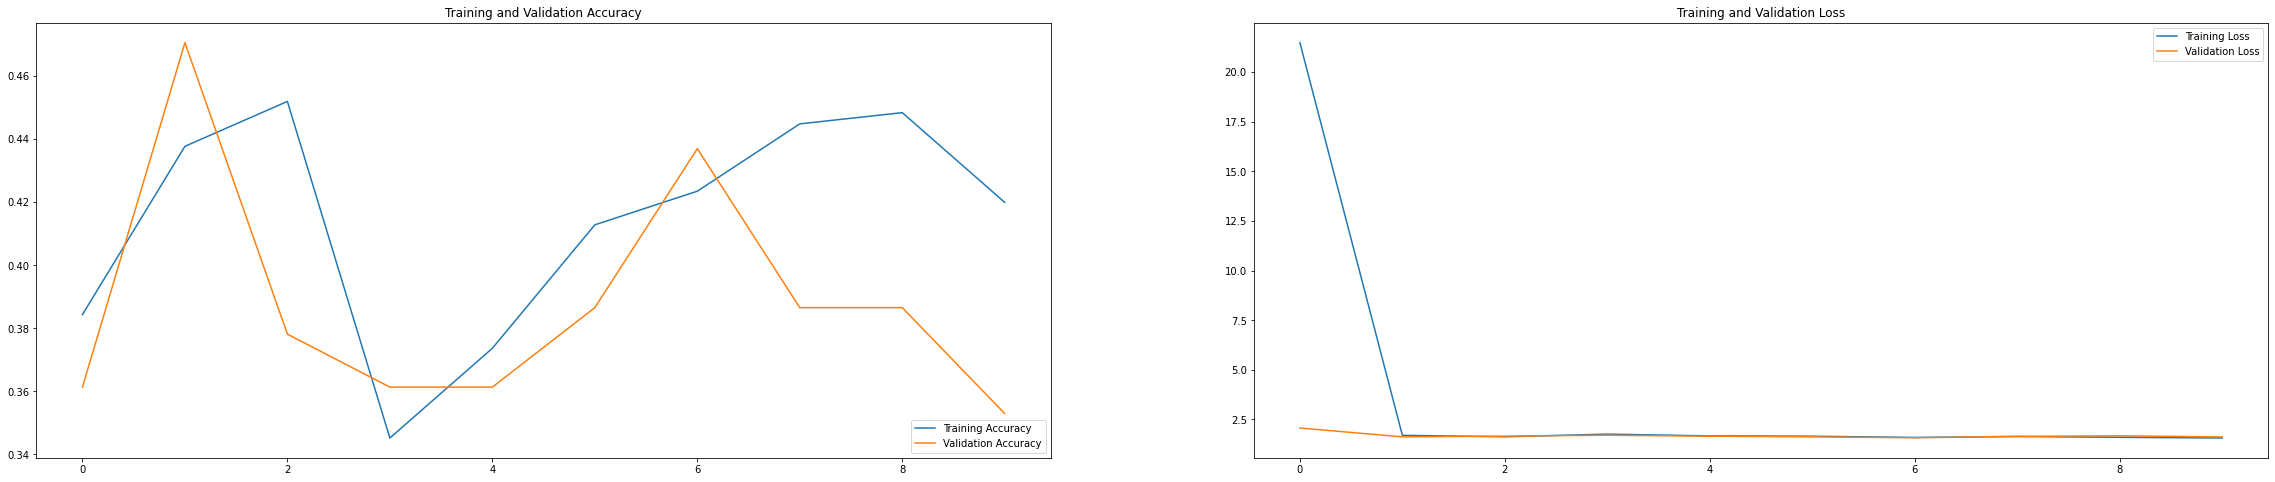

In [29]:
import statistics 

acc = history_augumentation.history['sparse_categorical_accuracy']
val_acc = history_augumentation.history['val_sparse_categorical_accuracy']

loss = history_augumentation.history['loss']
val_loss = history_augumentation.history['val_loss']

epochs_range = range(10)
print(epochs_range)

plt.figure(figsize=(40, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./statistics/training_x_val.png',  dpi = 300)
plt.show()



## Evaluate

In [30]:
print("Evaluate on test data")
results = model_augumentation.evaluate(x_val, y_val, batch_size=2)
print("test loss, test acc:", results)

Evaluate on test data
60/60 [==============================] - 0s 3ms/step - loss: 1.6247 - sparse_categorical_accuracy: 0.4706
test loss, test acc: [1.6247254610061646, 0.47058823704719543]


## Matriz de Confusão

In [31]:
predictions = model_augumentation.predict(x_val)
pred_labels = []
for predict in predictions:
    pred_labels.append(np.argmax(predict))
confusion_matrix = tf.math.confusion_matrix(y_val, pred_labels)
print(confusion_matrix)

tf.Tensor(
[[11  0  6  0  0]
 [13  0  7  5  3]
 [ 7  0 13  0  1]
 [ 8  0  6  9  5]
 [ 0  0  0  2 23]], shape=(5, 5), dtype=int32)


## Heatmap

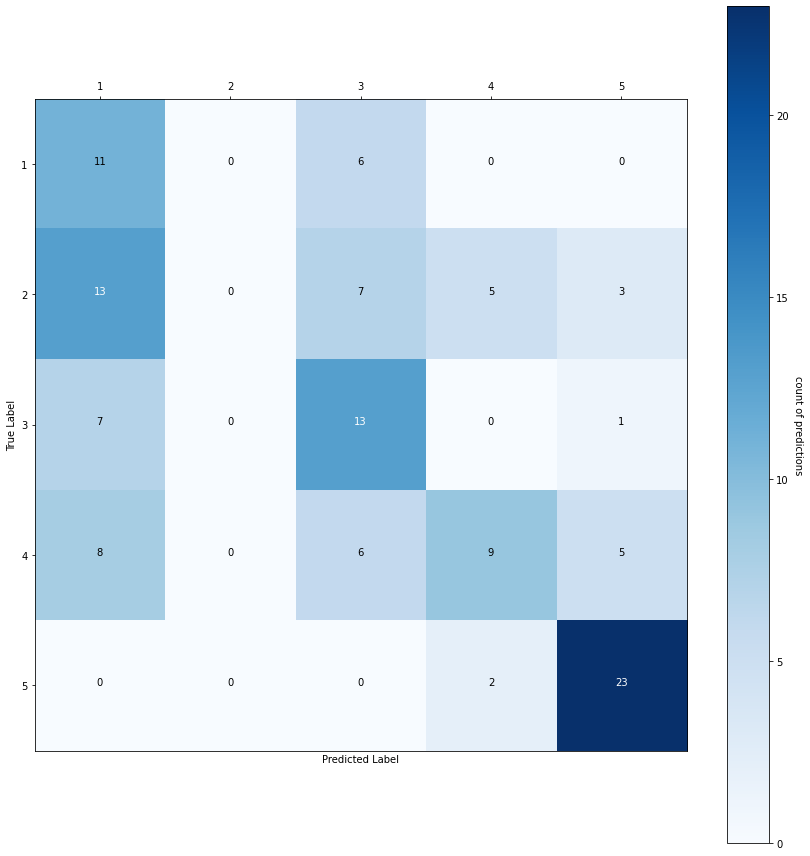

In [32]:
y_pred_classes = np.argmax(predictions, axis=1)

y_true = y_val
errors = (y_pred_classes - y_true != 0)

labels = ['1','2','3','4','5']

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = predictions[errors]
y_true_errors = y_true[errors]
x_test_errors = []

cm = sklearn.metrics.confusion_matrix(y_true, y_pred_classes)
thresh = cm.max() / 2,

fig, ax = plt.subplots(figsize = (12, 12))
im, cbar = stats.heatmap(cm, labels, labels, ax = ax,
cmap = plt.cm.Blues, cbarlabel = 'count of predictions')

texts = stats.annotate_heatmap(im, data = cm, threshold = thresh)

fig.tight_layout()
plt.show()
fig.savefig('statistics/heatmap.png', dpi=72)

## Classification report

In [56]:
target_names = ['class 1', 'class 2', 'class 3','class 4', 'class 5', 'class 6','class 7', 'class 8', 'class 9']
classification_report = sklearn.metrics.classification_report(pred_labels, y_val, target_names=target_names)

## Salvando Relatórios

In [57]:
arq = open("./statistics/relatorio.txt", 'w')
arq.write(f"Modelo:Augumentation 2 Camadas de Convolução\n\nEvaluate:\n{results}\n\n Matriz de Confusão:\n{confusion_matrix}\n\nClassification Report:\n{classification_report}\n\n")
arq.close()